# Data Preperation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler


# Load the data
data = pd.read_csv('data/Sleep_Efficiency.csv')

# Rename all columns to lower case and replace spaces with underscores
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Drop "id", "wakeup_time", "bedtime"
data = data.drop(columns=["id", "wakeup_time", "bedtime"])

# Hot encoding for "Gender", "Smoking Status"
data = pd.get_dummies(data, columns=["gender", "smoking_status"], drop_first=True)
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Fill missing values with the mean of the column
data = data.fillna(data.mean())

# Drop the original columns used for interaction terms
data = data.drop(columns=['deep_sleep_percentage', 'light_sleep_percentage'])

# Scale all data
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Define the features (X) and target (y)
X = data.drop(columns=['sleep_efficiency'])
y = data['sleep_efficiency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

data.head(n=15)


,age,sleep_duration,sleep_efficiency,rem_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,exercise_frequency,gender_male,smoking_status_yes
0,1.878342,-1.693157,0.674260,-1.310325,-1.238766,-8.066979e-01,-0.736095,0.852853,-1.008889,1.391066
1,2.182347,-0.537977,-0.954315,-1.026401,1.025607,-8.066979e-01,1.145672,0.852853,0.991189,1.391066
2,-0.021691,0.617204,0.748286,-0.742476,-0.483975,-8.066979e-01,-0.736095,0.852853,-1.008889,-0.718873
3,-0.021691,-1.693157,-2.064707,0.109298,1.025607,8.985496e-01,2.400184,-0.558547,-1.008889,1.391066
4,1.270331,0.617204,-0.214054,1.244997,1.025607,-8.066979e-01,1.145672,0.852853,0.991189,-0.718873
5,-0.325696,0.039613,0.822313,0.109298,-1.238766,-1.211651e-16,-0.736095,-0.558547,-1.008889,-0.718873
6,-1.009707,-1.693157,-1.842629,1.528922,0.270816,8.985496e-01,-0.736095,-0.558547,-1.008889,1.391066
7,0.966326,2.927564,0.822313,1.528922,-1.238766,8.985496e-01,-0.736095,0.852853,0.991189,1.391066
8,0.054311,-1.693157,0.008025,1.528922,1.025607,8.985496e-01,-0.736095,-0.558547,-1.008889,-0.718873
9,-2.225728,1.772384,-1.768603,-1.310325,1.780399,-8.066979e-01,-0.736095,-1.264247,-1.008889,-0.718873


# Lasso Regression

In [2]:
# Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
r2 = r2_score(y_pred=y_pred, y_true=y_test)
print('\nMean Absolute Error:', mae, '\nMean Squared Error:', mse, '\nR2 Score:', r2)


Mean Absolute Error: 0.6312865153127492 
Mean Squared Error: 0.5818426077255813 
R2 Score: 0.4777538653034725


# Improve model performance with LassoCV

In [3]:
param_grid = {
    'alphas': [0.01, 0.1, 1, 10]
}

lasso_cv = LassoCV(alphas=param_grid['alphas'], cv=5)
lasso_cv.fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)
mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
r2 = r2_score(y_pred=y_pred, y_true=y_test)
print('Best alpha:', lasso_cv.alpha_, '\nMAE:', mae, '\nMSE:', mse, '\nR2:', r2)

Best alpha: 0.01 
MAE: 0.5618435614780842 
MSE: 0.5006722858429576 
R2: 0.5506101434316399


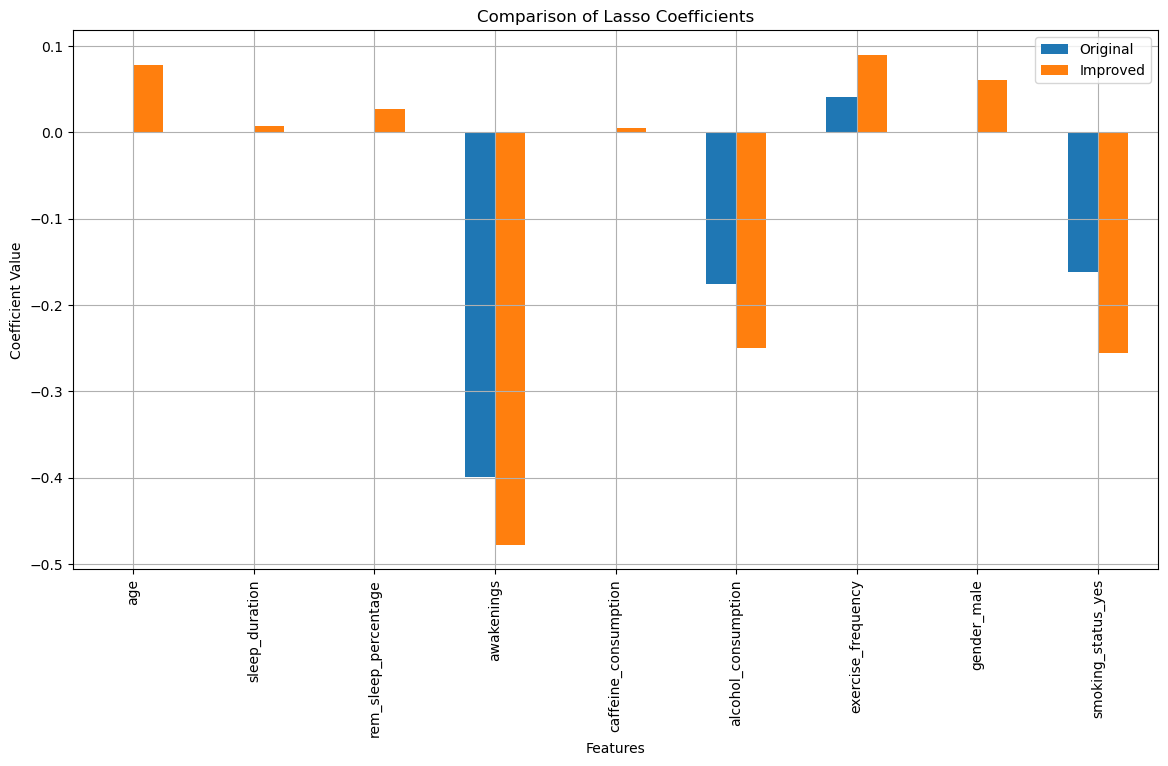

In [4]:
# Assuming 'lasso' is your fitted model and X_train is your training data
coefs_original = pd.Series(lasso.coef_, index=X_train.columns)
coefs_improved = pd.Series(lasso_cv.coef_, index=X_train.columns)
coefs = pd.DataFrame({'Original': coefs_original, 'Improved': coefs_improved})

# Plotting the coefficients
coefs.plot(kind='bar', figsize=(14, 7))
plt.title('Comparison of Lasso Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

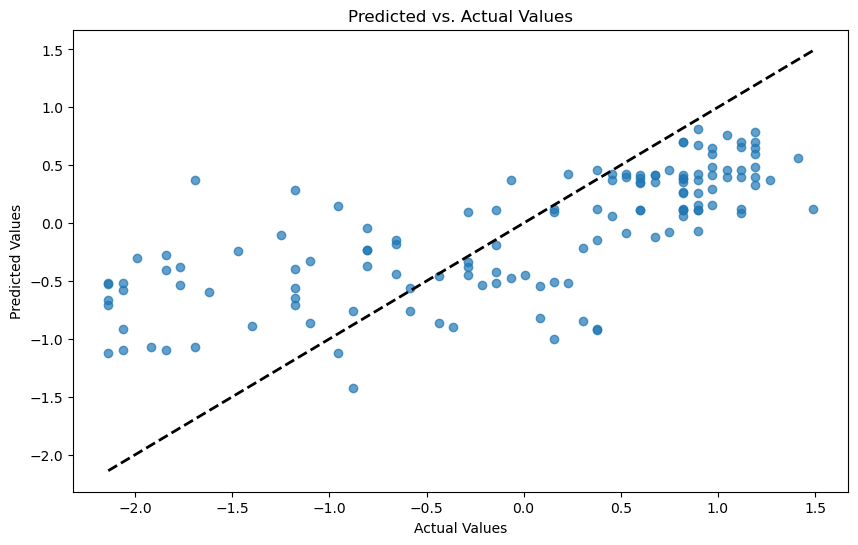

In [5]:
# Assuming you have a test set: X_test, y_test
y_pred = lasso.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()


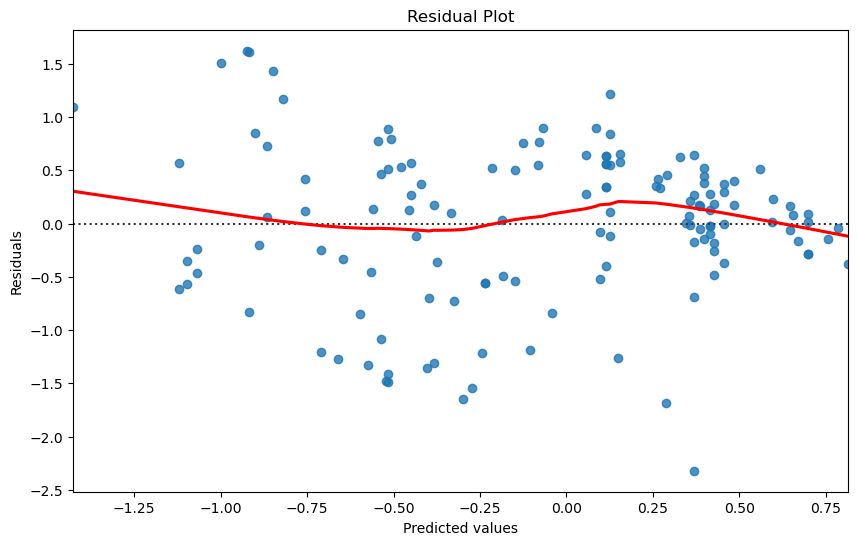

In [6]:
# Plot the residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
